In [5]:
# ===========================================================
# 📌 1. IMPORT LIBRARIES
# ===========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import joblib

# ===========================================================
# 📌 2. LOAD DATASET (NO URL – sklearn import)
# ===========================================================
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(df.head())
print(df.info())
print(df.describe())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000

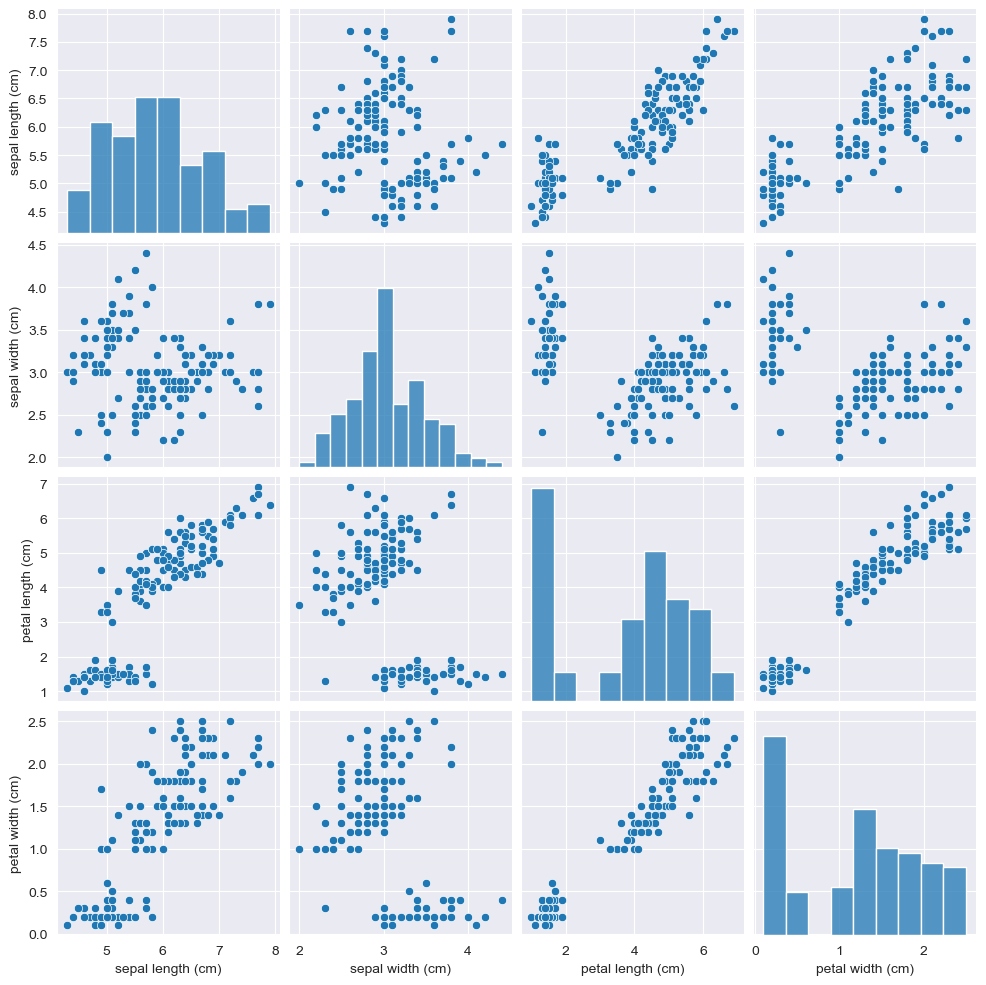

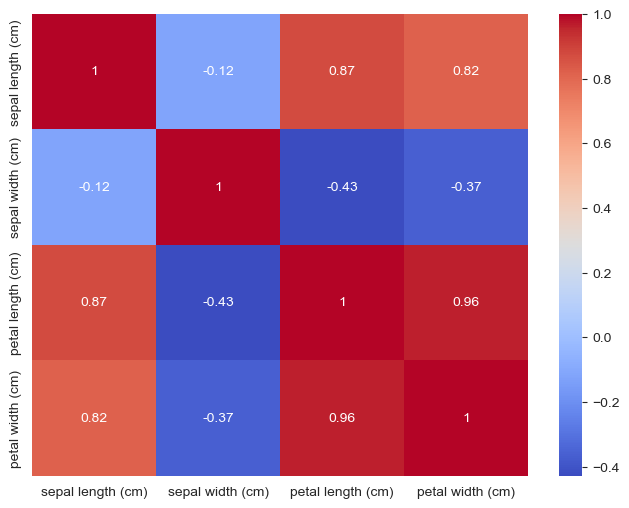

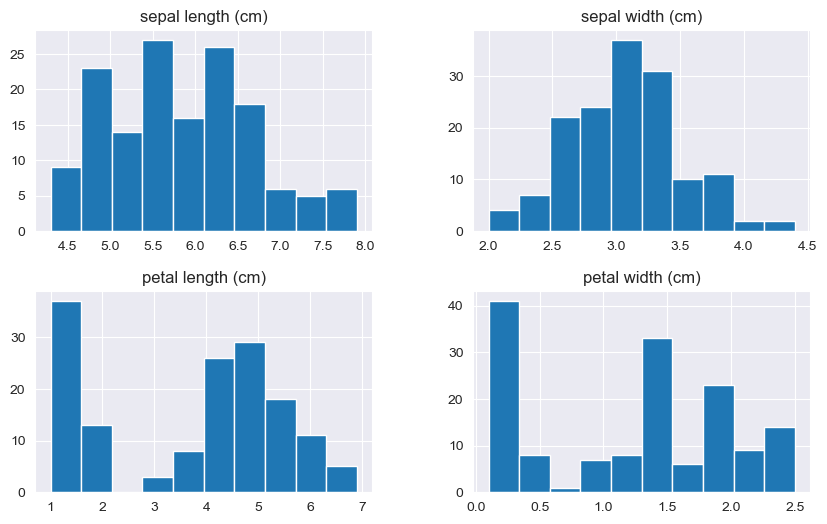

In [6]:
# Pairplot
sns.pairplot(df)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Distribution plots
df.hist(figsize=(10,6))
plt.show()


In [7]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


E:\Anaconda\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

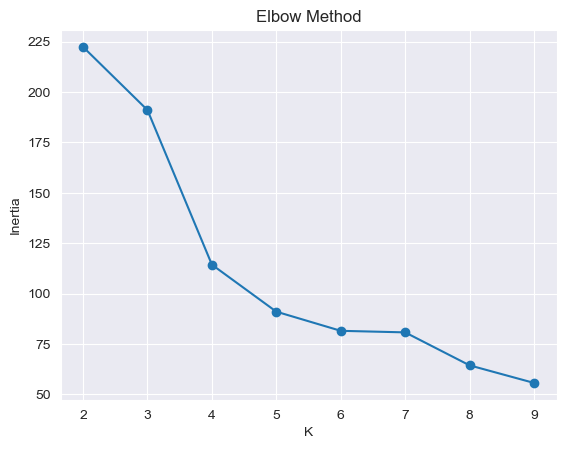

In [8]:
inertia_scores = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    inertia_scores.append(km.inertia_)

plt.plot(K, inertia_scores, marker='o')
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [10]:
silhouette_vals = []

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_scaled)
    sil_score = silhouette_score(df_scaled, labels)
    silhouette_vals.append(sil_score)
    print("K =", k, "Silhouette =", sil_score)


K = 2 Silhouette = 0.5817500491982808
K = 3 Silhouette = 0.4798814508199817
K = 4 Silhouette = 0.3850454053045392
K = 5 Silhouette = 0.34503345350274617
K = 6 Silhouette = 0.3339432304006177
K = 7 Silhouette = 0.2664290993719981
K = 8 Silhouette = 0.34162906041313373
K = 9 Silhouette = 0.32439914389835445


E:\Anaconda\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

df["cluster"] = kmeans.labels_

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  
0        1  
1        2  
2        2  
3        2  
4        1  


E:\Anaconda\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(list(df.columns[:-1]), "model_columns.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model Saved Successfully!")


Model Saved Successfully!


In [13]:
import streamlit as st
import numpy as np
import joblib

model = joblib.load("kmeans_model.pkl")
columns = joblib.load("model_columns.pkl")
scaler = joblib.load("scaler.pkl")

st.title("🌼 Iris Clustering Prediction App (K-Means)")

inputs = []

for col in columns:
    val = st.number_input(col, value=0.0)
    inputs.append(val)

arr = np.array(inputs).reshape(1, -1)
arr_scaled = scaler.transform(arr)

if st.button("Predict Cluster"):
    cluster = model.predict(arr_scaled)[0]
    st.success(f"🌟 Predicted Cluster: {cluster}")


2025-12-04 18:25:01.252 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-04 18:25:01.861 
  command:

    streamlit run E:\Anaconda\envs\ml_env\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-04 18:25:01.863 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-04 18:25:01.864 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-04 18:25:01.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-04 18:25:01.870 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-04 18:25:01.871 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-04 18:25:01.875 Thread 'MainThread': mis